# Early Stopping


In [3]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import numpy as np
import matplotlib.pyplot as plt
from srcs.modules.optimizer import SGD, Adam

from srcs.modules.functions import Softmax, np_log, numerical_gradient
from srcs.modules.activation import ReLU, Sigmoid
from srcs.modules.loss import CrossEntropyLoss
from srcs.modules.init import he_normal, xavier_normal, normal

from srcs.modules.layer import Dense
from srcs.modules.model import Sequential
from srcs.modules.plot import plot_multiple_models
from srcs.dataloader import get_wdbc, train_test_split
from srcs.train import train_model
from srcs import train
from srcs.modules.io import get_ndarray

seed = 42

In [4]:
X, y = get_ndarray(
    wdbc_csv_path="../data/data.csv",
    y_onehot=True,
    drop_id=True,
    apply_normalize=False,
)

test_size = 0.2
shuffle = False
random_state = 42
X_train, X_valid, t_train, t_valid = train_test_split(
    X=X,
    y=y,
    test_size=test_size,
    shuffle=shuffle,
    random_state=random_state,
    stratify=True,
)

type(X): <class 'numpy.ndarray'>



training NoEarlyStopping...
 Training WDBC...
  X_train shape: (456, 30)
  X_valid shape: (113, 30)


 Metrics: 
  Train loss:0.0530 [Accuracy:0.9825, Precision:0.9765, Recall:0.9765, F1:0.9765]
  Valid loss:0.1328 [Accuracy:0.9469, Precision:0.9286, Recall:0.9286, F1:0.9286]


training EarlyStopping_300...
 Training WDBC...
  X_train shape: (456, 30)
  X_valid shape: (113, 30)


 Metrics: 
  Train loss:0.0780 [Accuracy:0.9627, Precision:0.9527, Recall:0.9471, F1:0.9499]
  Valid loss:0.0910 [Accuracy:0.9646, Precision:0.9750, Recall:0.9286, F1:0.9512]



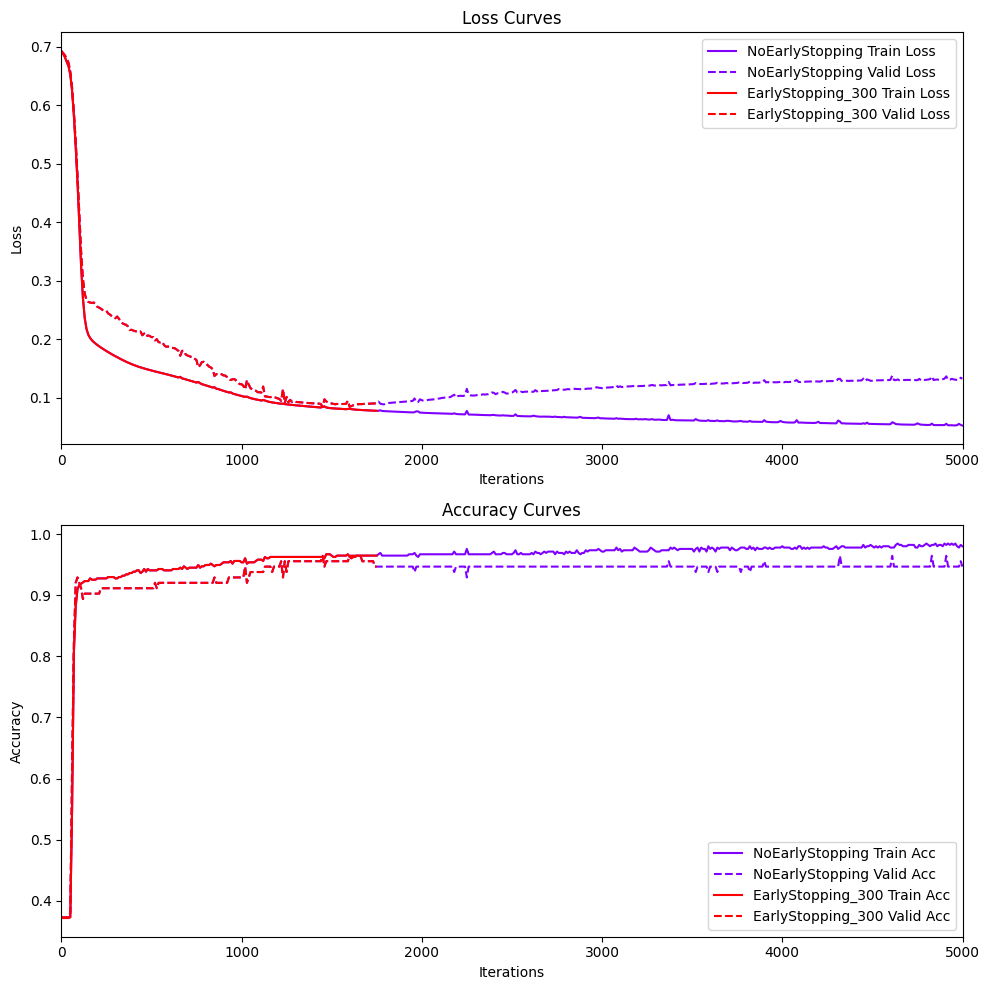

In [13]:
conditions = {
    "NoEarlyStopping"   : None,
    "EarlyStopping_300": 300,
}


models_results = []
max_itr = 5000
for name, patience in conditions.items():
    print(f"\ntraining {name}...")
    net = Sequential(
        layers=[
            Dense(in_features=30, out_features=200, activation=ReLU, init_method=normal, seed=seed),
            Dense(in_features=200, out_features=100, activation=ReLU, init_method=normal, seed=seed),
            Dense(in_features=100, out_features=50, activation=ReLU, init_method=normal, seed=seed),
            Dense(in_features=50, out_features=2, activation=Softmax, init_method=normal, seed=seed)
        ],
        criteria=CrossEntropyLoss,
        optimizer=Adam(lr=0.0001),
        weight_decay=0,
    )

    iterations, train_losses, train_accs, valid_losses, valid_accs = train_model(
        model=net,
        X_train=X_train,
        t_train=t_train,
        X_valid=X_valid,
        t_valid=t_valid,
        iters_num=max_itr,
        verbose=False,
        plot=False,
        metrics_interval=10,
        patience=patience,
        name="WDBC"
    )

    models_results.append({
        'name'          : name,
        'iterations'    : iterations,
        'train_losses'  : train_losses,
        'train_accs'    : train_accs,
        'valid_losses'  : valid_losses,
        'valid_accs'    : valid_accs
    })


plot_multiple_models(max_itr, models_results)
